In [1]:
# 1.)
import requests
import pandas as pd
import numpy as np
import math

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
r = requests.get(url, allow_redirects=True)
open('auto_ds', 'wb').write(r.content)

#2.)
df = pd.read_csv('auto_ds', sep=",", header = None, engine="python")

df.columns = ['symbolizing','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',\
              'drive-wheels','engine-location',\
              'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',\
             'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower',\
             'peak-rpm','city-mpg','highway-mpg','price']

#convert data types of columns to respective types
df = pd.DataFrame(df)
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'].str.replace(' ',''), errors='force')
df['bore'] = pd.to_numeric(df['bore'].str.replace(' ',''), errors='force')
df['stroke'] = pd.to_numeric(df['stroke'].str.replace(' ',''), errors='force')
df['horsepower'] = pd.to_numeric(df['horsepower'].str.replace(' ',''), errors='force')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'].str.replace(' ',''), errors='force')
df['price'] = pd.to_numeric(df['price'].str.replace(' ',''), errors='force')


In [2]:
#3.)
df2 = df
df = df.fillna(0)
df2 = df2.fillna(0)
#still cant get column 'normalized-loses' to convert to average

#converting df values
for columntitle,column in df.iteritems():
    #check for null or 0 category values
    if (column.dtype == object):
        mode = column.value_counts().index[0]
        for element in column:
            if (element == None or element == 0):
                element = mode
                
    #fill df integer bad values
    if (column.dtype == np.int64):
        average = column.mean()
        average = int(round(average))
        for element in column:
            if (element == 0):
                element = average
    
    #fill df float datatype bad values
    if (column.dtype == np.float64):
        average = column.mean()
        average = float(str(round(average,2)))
        for element in column:
            if (element == 0):
                element = average

#same as the previous for block, but for df2
for columntitle,column in df2.iteritems():
    #check for null or 0 category values
    if (column.dtype == object):
        mode = column.value_counts().index[0]
        for element in column:
            if (element == None or element == 0):
                element = mode
                
    #fill integer bad values
    if (column.dtype == np.int64):
        average = column.mean()
        average = int(round(average))
        for element in column:
            if (element == 0):
                element = average
            
    #fill float datatype bad values
    if (column.dtype == np.float64):
        average = column.mean()
        average = float(str(round(average,2)))
        for element in column:
            if (element == 0):
                element = average


In [3]:
#4.)
#minimum is going to be off because #3 isnt finished for normalized-losses
m = min(df2['normalized-losses'])
M = max(df2['normalized-losses'])

newlist = []
for element in df2['normalized-losses']:
    newrow = (element-m)/(M-m)
    newlist.append(float(str(round(newrow, 4))))

addlist = pd.Series(newlist)
df2['loss-percent'] = addlist.values

In [4]:
#5.)
from collections import defaultdict

#make a dictionary with keyVal pairs of increasing bin range of 50 to put items with corresponding engine sizes into
d = defaultdict(list)
for element in range(0, len(df2['engine-size'])):
    item = df2['engine-size'][element]
    if (item <= 50):
        d['engine size 0 to 50'].append(item)
    if (item > 50 and item <=100):
        d['engine size 51 to 100'].append(item)
    if (item > 100 and item <=150):
        d['engine size 101 to 150'].append(item)
    if (item > 150 and item <=200):
        d['engine size 151 to 200'].append(item)
    if (item > 200 and item <=250):
        d['engine size 201 to 250'].append(item)
    if (item > 250 and item <=300):
        d['engine size 251 to 300'].append(item)
    if (item > 300 and item <=350):
        d['engine size 301 to 350'].append(item)

#convert dictionary 'd' to a list, extend its size to match df2's number of rows, then add it to df2
addlist = [(k,v) for k,v in d.items()]
addlist = addlist[:205] + [0]*(205-len(addlist)) #fills column with 0s to match the lenth of the other columns
df2['binned-engine-size'] = addlist

#d.items()
#df2['binned-engine-size']

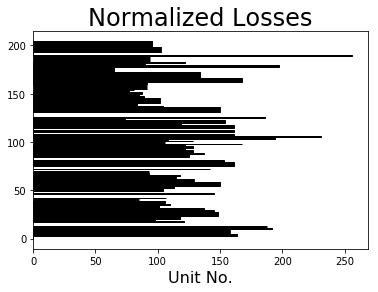

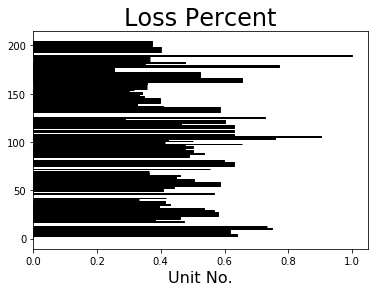

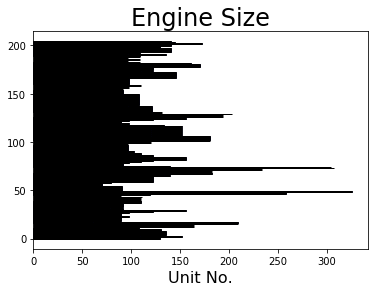

In [11]:
#6.)
import matplotlib.pyplot as plt

#graph for normalized losses
length = len(df2['normalized-losses'])
graph_range = range(0,length)
plt.barh(graph_range, df2['normalized-losses'], color='blue', edgecolor='black')
plt.xlabel('Unit No.', fontsize=16)
plt.ylabel('')
plt.title('Normalized Losses', fontsize=24)
plt.show()

#graph for losspercent
length = len(df2['loss-percent'])
graph_range = range(0,length)
plt.barh(graph_range, df2['loss-percent'], color='blue', edgecolor='black')
plt.xlabel('Unit No.', fontsize=16)
plt.ylabel('')
plt.title('Loss Percent', fontsize=24)
plt.show()

#graph for engine size
length = len(df2['engine-size'])
graph_range = range(0,length)
plt.barh(graph_range, df2['engine-size'], color='blue', edgecolor='black')
plt.xlabel('Unit No.', fontsize=16)
plt.ylabel('')
plt.title('Engine Size', fontsize=24)
plt.show()

#graph for binned engine size
#...



In [6]:
#7.) 1 of 2

#table summary for df numeric columns
df_numerics = df.select_dtypes(include=[np.number])
df_numerics.describe().round(2)

,symbolizing,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,97.60,98.76,174.05,65.91,53.72,2555.57,126.91,3.26,3.19,10.14,103.24,5075.37,25.22,30.75,12949.43
std,1.25,58.28,6.02,12.34,2.15,2.44,520.68,41.64,0.54,0.55,3.97,40.83,694.65,6.54,6.89,8079.04
min,-2.00,0.00,86.60,141.10,60.30,47.80,1488.00,61.00,0.00,0.00,7.00,0.00,0.00,13.00,16.00,0.00
25%,0.00,77.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.13,3.10,8.60,70.00,4800.00,19.00,25.00,7689.00
50%,1.00,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10198.00
75%,2.00,137.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [7]:
#7.) 2 of 4

#table summary for df object columns
df_objects = df.select_dtypes(include=[np.object])
df_objects.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [8]:
#7.) 3 of 4

#table summary for df2 numeric columns
df2_numerics = df2.select_dtypes(include=[np.number])
df2_numerics.describe().round(2)

,symbolizing,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,loss-percent
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,97.60,98.76,174.05,65.91,53.72,2555.57,126.91,3.26,3.19,10.14,103.24,5075.37,25.22,30.75,12949.43,0.38
std,1.25,58.28,6.02,12.34,2.15,2.44,520.68,41.64,0.54,0.55,3.97,40.83,694.65,6.54,6.89,8079.04,0.23
min,-2.00,0.00,86.60,141.10,60.30,47.80,1488.00,61.00,0.00,0.00,7.00,0.00,0.00,13.00,16.00,0.00,0.00
25%,0.00,77.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.13,3.10,8.60,70.00,4800.00,19.00,25.00,7689.00,0.30
50%,1.00,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10198.00,0.40
75%,2.00,137.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00,0.54
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,1.00


In [9]:
#7.) 4 of 4
#.describe isnt working with df2[binned engine size]
del df2['binned-engine-size']

#table summary for df2 object columns
df2_objects = df2.select_dtypes(include=[np.object])
df2_objects.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [10]:
#test block

#df2.dtypes 
#df.to_csv('a4out.csv')
#df2
#df